importing everything at one place to get a neet flow of coding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.0 MB/s eta 0:00:00


In [3]:
import kerastuner
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

<ipython-input-3-65cf8bb72cfc>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [5]:
from google.colab import files
fil = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [6]:
gas = pd.read_csv("gas_turbines.csv")

In [7]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [8]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [10]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


<ipython-input-11-b1163af78bb0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gas[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


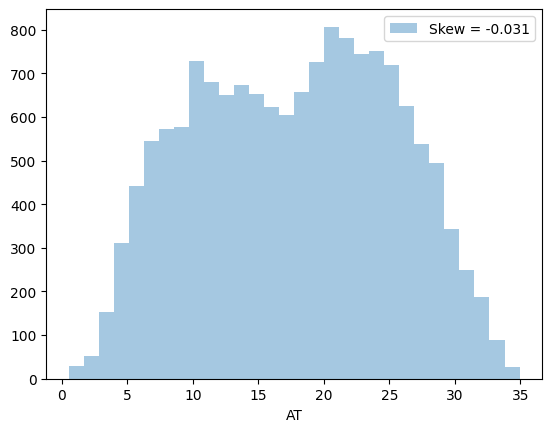

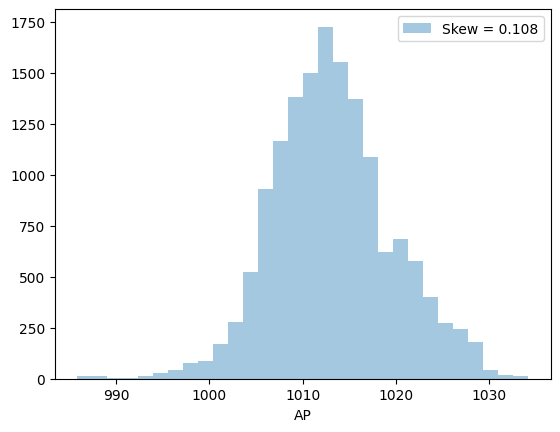

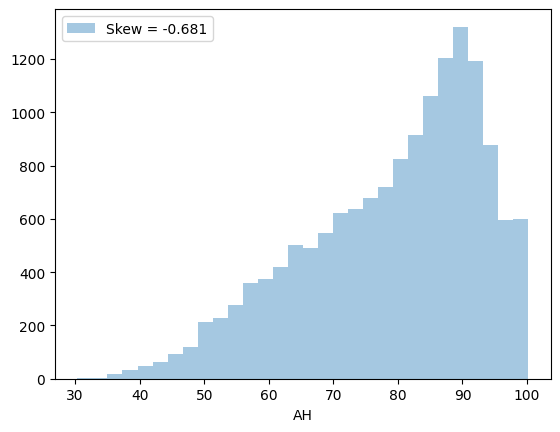

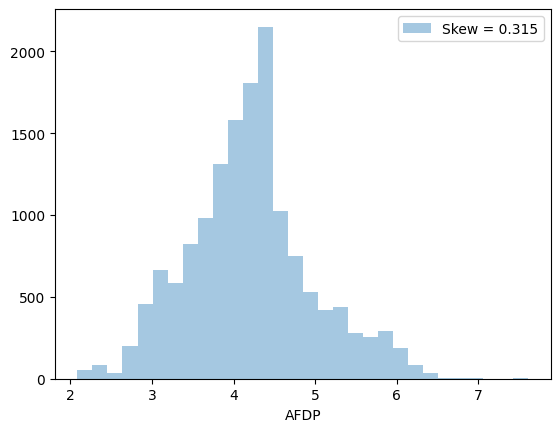

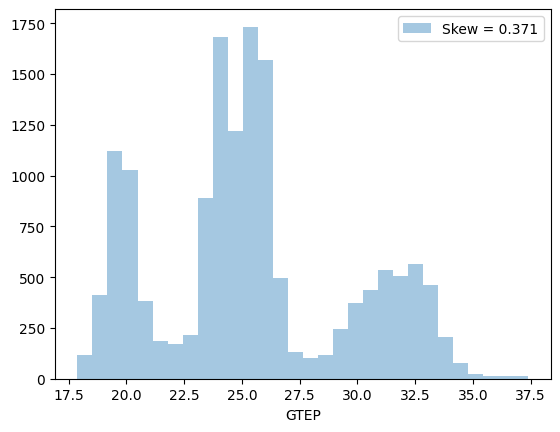

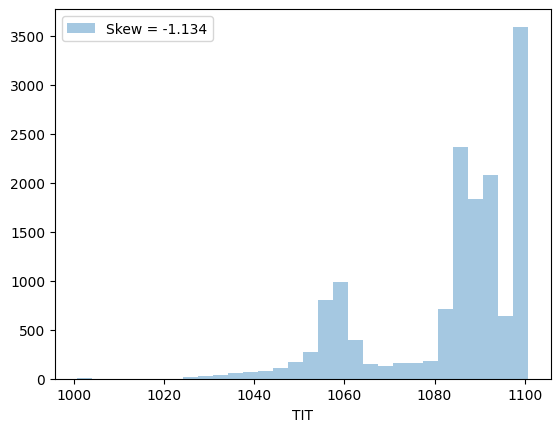

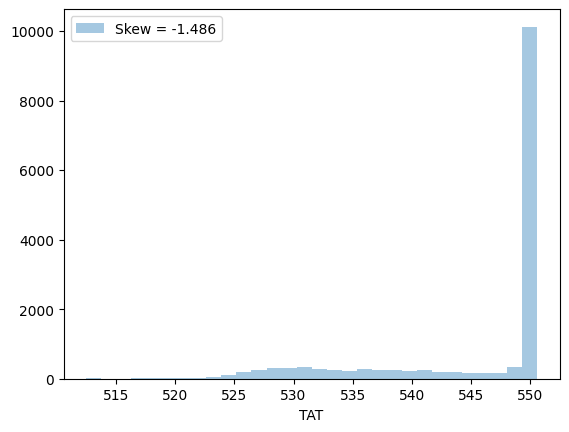

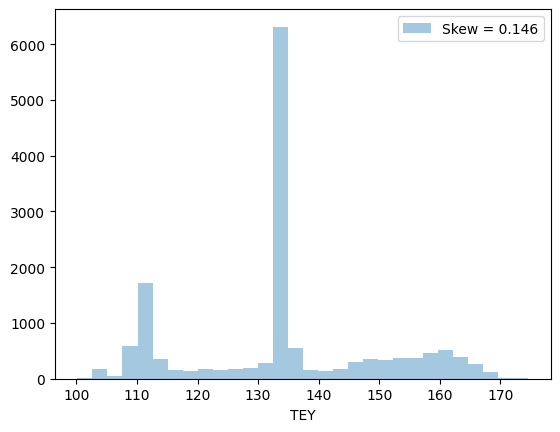

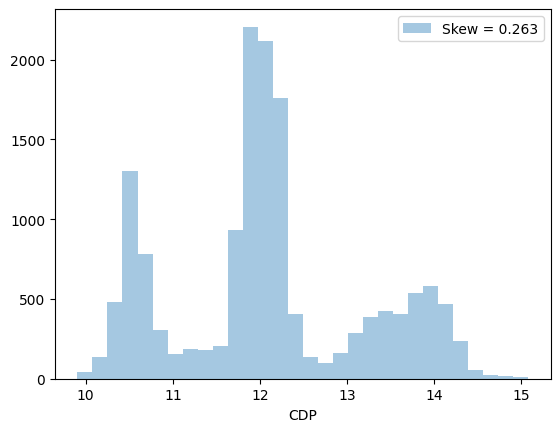

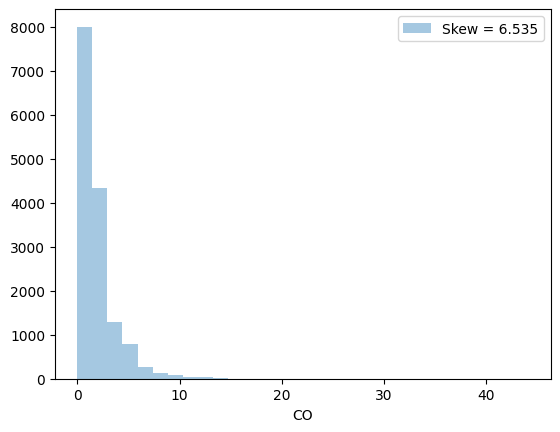

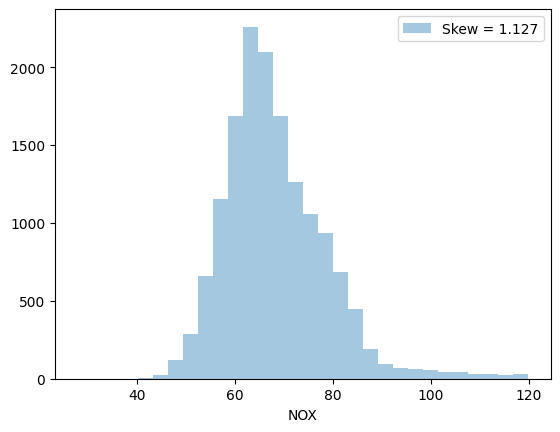

In [11]:
numerical_features=[feature for feature in gas.columns if gas[feature].dtypes != 'O']
for feat in numerical_features:
    skew = gas[feat].skew()
    sns.distplot(gas[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

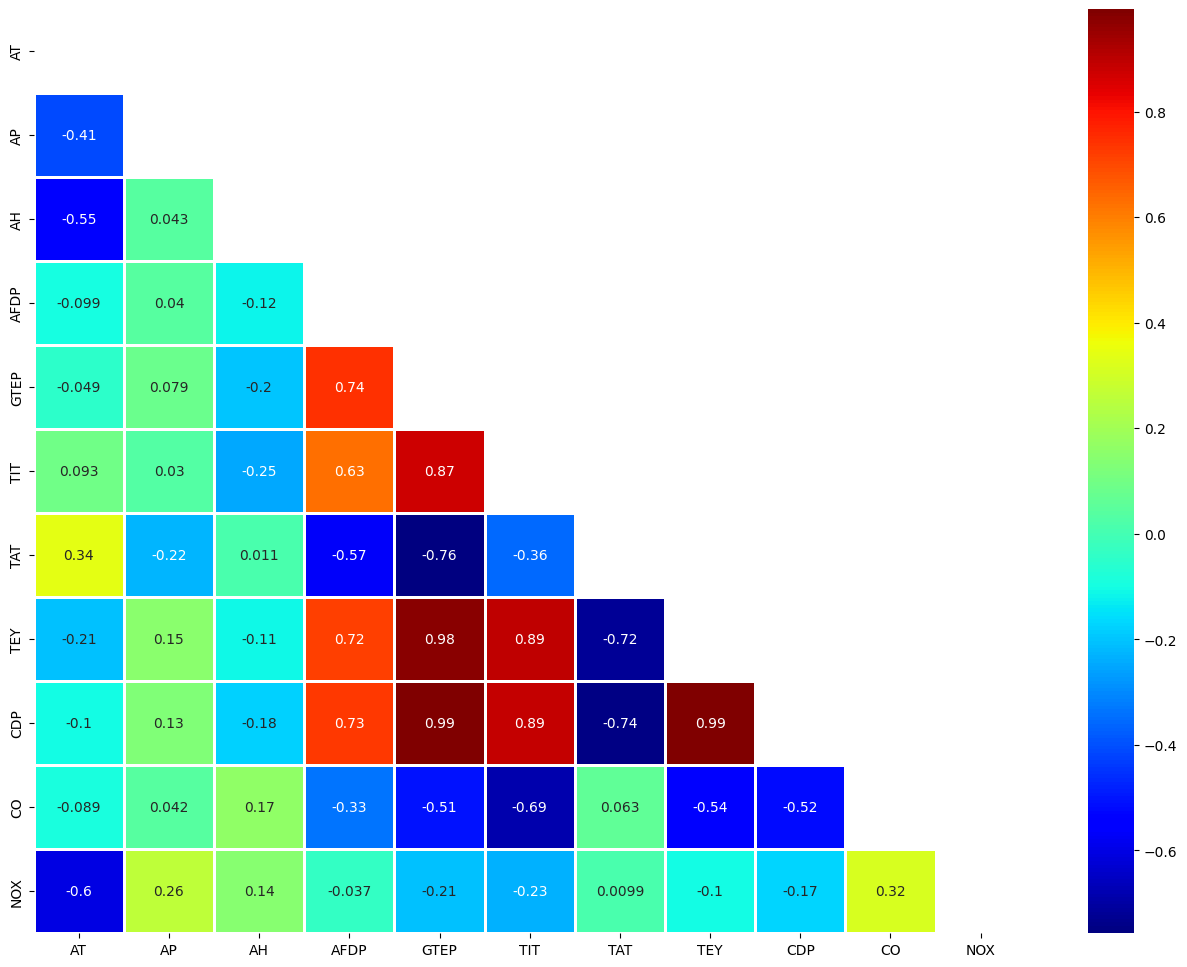

In [12]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(gas.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=gas.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask);

In [13]:
X = gas.drop('TEY', axis=1)
Y = gas[["TEY"]]

In [14]:
gas2 = gas.copy()

In [15]:
correlations = gas2.corrwith(gas.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

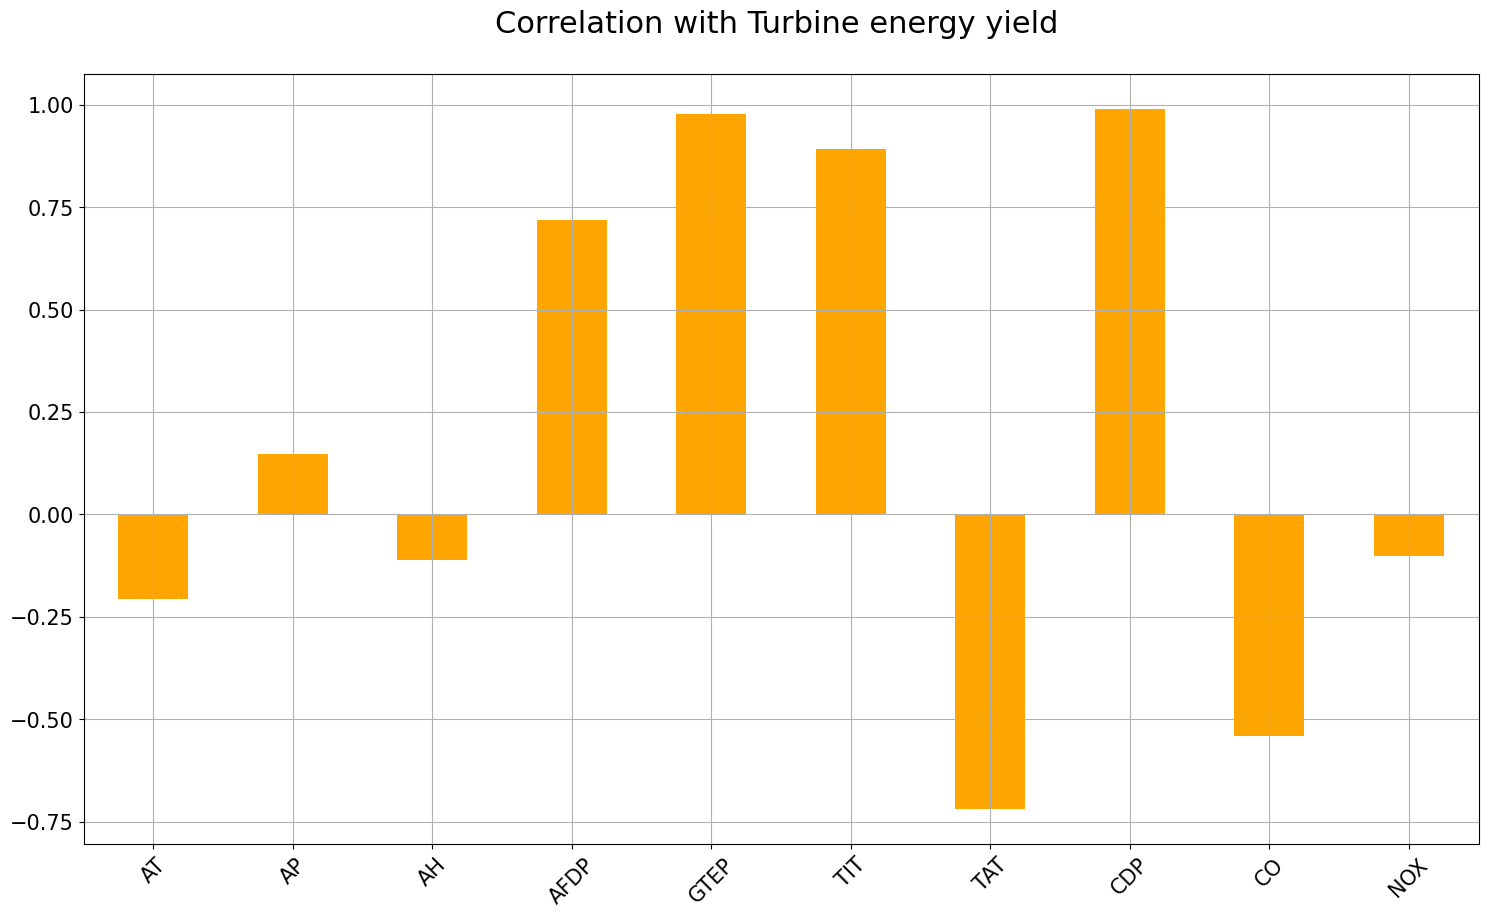

In [16]:
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

#Feature importance
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
scores = fit.scores_

features = fit.transform(X)

score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712981,CDP
4,1.600133,GTEP
5,1.322738,TIT
6,0.892793,TAT
3,0.660553,AFDP
8,0.512394,CO
0,0.412948,AT
9,0.301205,NOX
1,0.137884,AP
2,0.097564,AH


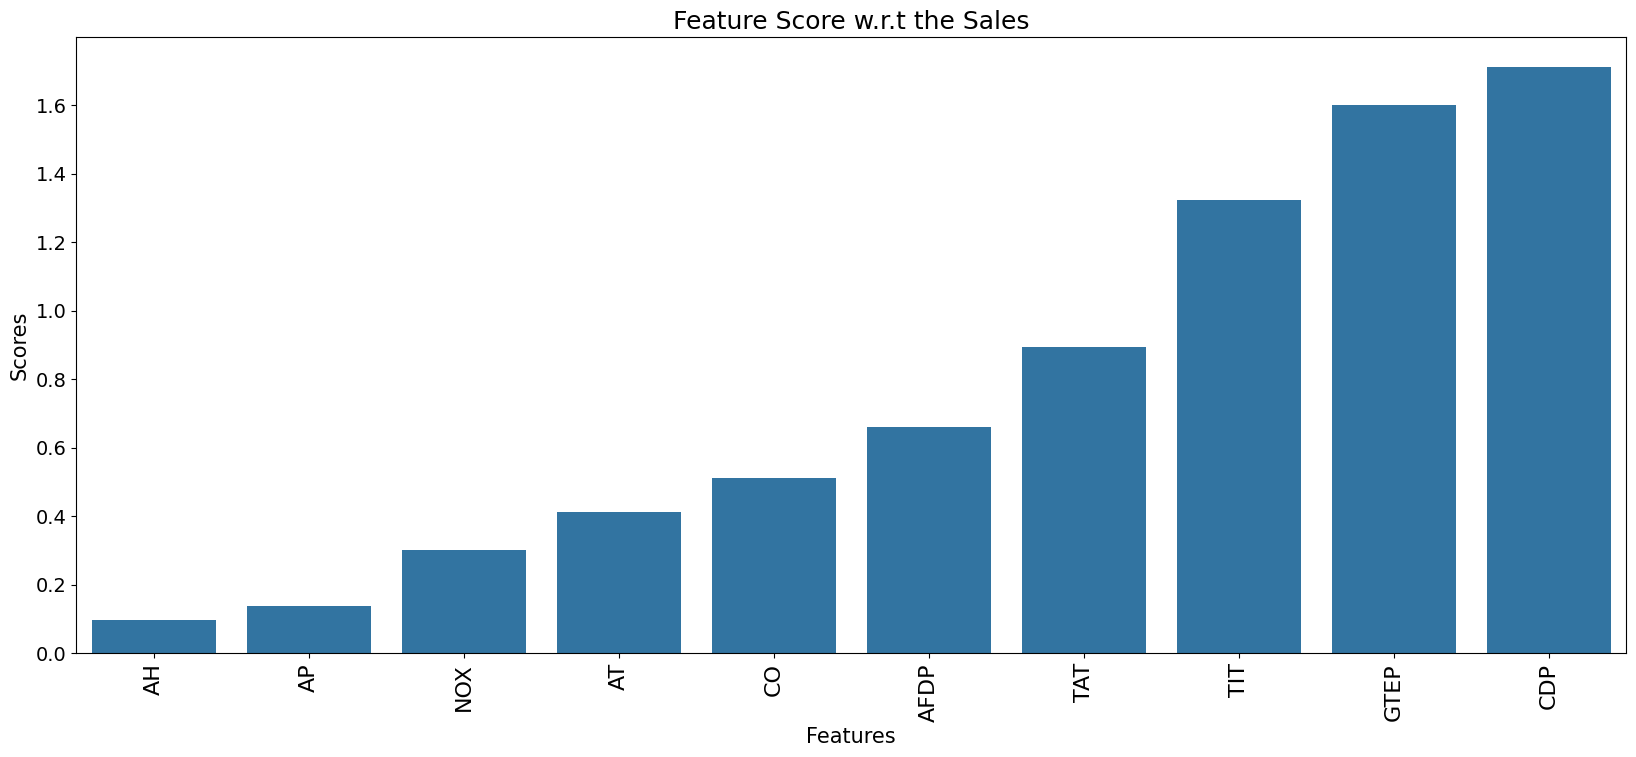

In [19]:
plt.figure(figsize=(20,8))

sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)

plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [20]:
model_data = gas[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [21]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
len(continuous_feature)

8

In [22]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


Train & test

In [23]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


Hyperparameter Tuning

In [24]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [25]:
import kerastuner
import keras
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
from keras import layers
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


It takes a lot of time so we have commented it, while doing we can run it

In [26]:
# tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

In [27]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")


Tuning

# Model-1

In [28]:
pip install scikeras

In [29]:
import scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV

In [30]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,30,50]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/9] END .....batch_size=10, epochs=50;, score=0.997 total time= 1.4min
[CV 2/5; 1/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  42.1s
[CV 3/5; 1/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  30.3s
[CV 4/5; 1/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/9] END .....batch_size=10, epochs=50;, score=0.998 total time=  42.1s
[CV 5/5; 1/9] START batch_size=10, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/9] END .....batch_size=10, epochs=50;, score=0.999 total time=  27.0s
[CV 1/5; 2/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/9] END ....batch_size=10, epochs=100;, score=0.998 total time=  54.0s
[CV 2/5; 2/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/9] END ....batch_size=10, epochs=100;, score=0.998 total time=  53.8s
[CV 3/5; 2/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/9] END ....batch_size=10, epochs=100;, score=0.998 total time=  52.8s
[CV 4/5; 2/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/9] END ....batch_size=10, epochs=100;, score=0.998 total time=  52.9s
[CV 5/5; 2/9] START batch_size=10, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/9] END ....batch_size=10, epochs=100;, score=0.999 total time=  52.3s
[CV 1/5; 3/9] START batch_size=10, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/9] END ....batch_size=10, epochs=150;, score=0.998 total time= 1.3min
[CV 2/5; 3/9] START batch_size=10, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/9] END ....batch_size=10, epochs=150;, score=0.998 total time= 1.4min
[CV 3/5; 3/9] START batch_size=10, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/9] END ....batch_size=10, epochs=150;, score=0.998 total time= 1.4min
[CV 4/5; 3/9] START batch_size=10, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/9] END ....batch_size=10, epochs=150;, score=0.998 total time= 1.4min
[CV 5/5; 3/9] START batch_size=10, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/9] END ....batch_size=10, epochs=150;, score=0.998 total time= 1.4min
[CV 1/5; 4/9] START batch_size=30, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/9] END .....batch_size=30, epochs=50;, score=0.998 total time=  11.3s
[CV 2/5; 4/9] START batch_size=30, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/9] END .....batch_size=30, epochs=50;, score=0.998 total time=   9.9s
[CV 3/5; 4/9] START batch_size=30, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/9] END .....batch_size=30, epochs=50;, score=0.998 total time=  12.2s
[CV 4/5; 4/9] START batch_size=30, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/9] END .....batch_size=30, epochs=50;, score=0.998 total time=  11.6s
[CV 5/5; 4/9] START batch_size=30, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/9] END .....batch_size=30, epochs=50;, score=0.999 total time=  11.5s
[CV 1/5; 5/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/9] END ....batch_size=30, epochs=100;, score=0.998 total time=  18.5s
[CV 2/5; 5/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/9] END ....batch_size=30, epochs=100;, score=0.999 total time=  21.5s
[CV 3/5; 5/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/9] END ....batch_size=30, epochs=100;, score=0.998 total time=  21.6s
[CV 4/5; 5/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/9] END ....batch_size=30, epochs=100;, score=0.998 total time=  18.6s
[CV 5/5; 5/9] START batch_size=30, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/9] END ....batch_size=30, epochs=100;, score=0.999 total time=  19.4s
[CV 1/5; 6/9] START batch_size=30, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/9] END ....batch_size=30, epochs=150;, score=0.999 total time=  42.0s
[CV 2/5; 6/9] START batch_size=30, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/9] END ....batch_size=30, epochs=150;, score=0.998 total time=  28.5s
[CV 3/5; 6/9] START batch_size=30, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/9] END ....batch_size=30, epochs=150;, score=0.998 total time=  27.9s
[CV 4/5; 6/9] START batch_size=30, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/9] END ....batch_size=30, epochs=150;, score=0.998 total time=  42.0s
[CV 5/5; 6/9] START batch_size=30, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/9] END ....batch_size=30, epochs=150;, score=0.998 total time=  42.0s
[CV 1/5; 7/9] START batch_size=50, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 7/9] END .....batch_size=50, epochs=50;, score=0.998 total time=  11.3s
[CV 2/5; 7/9] START batch_size=50, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 7/9] END .....batch_size=50, epochs=50;, score=0.998 total time=  11.3s
[CV 3/5; 7/9] START batch_size=50, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 7/9] END .....batch_size=50, epochs=50;, score=0.998 total time=   7.0s
[CV 4/5; 7/9] START batch_size=50, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 7/9] END .....batch_size=50, epochs=50;, score=0.998 total time=   6.3s
[CV 5/5; 7/9] START batch_size=50, epochs=50....................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 7/9] END .....batch_size=50, epochs=50;, score=0.998 total time=  11.9s
[CV 1/5; 8/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 8/9] END ....batch_size=50, epochs=100;, score=0.998 total time=  12.8s
[CV 2/5; 8/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 8/9] END ....batch_size=50, epochs=100;, score=0.999 total time=  12.6s
[CV 3/5; 8/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 8/9] END ....batch_size=50, epochs=100;, score=0.999 total time=  21.6s
[CV 4/5; 8/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 8/9] END ....batch_size=50, epochs=100;, score=0.998 total time=  12.3s
[CV 5/5; 8/9] START batch_size=50, epochs=100...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 8/9] END ....batch_size=50, epochs=100;, score=0.999 total time=  12.3s
[CV 1/5; 9/9] START batch_size=50, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 9/9] END ....batch_size=50, epochs=150;, score=0.998 total time=  18.3s
[CV 2/5; 9/9] START batch_size=50, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 9/9] END ....batch_size=50, epochs=150;, score=0.998 total time=  17.3s
[CV 3/5; 9/9] START batch_size=50, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 9/9] END ....batch_size=50, epochs=150;, score=0.998 total time=  18.2s
[CV 4/5; 9/9] START batch_size=50, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 9/9] END ....batch_size=50, epochs=150;, score=0.998 total time=  17.6s
[CV 5/5; 9/9] START batch_size=50, epochs=150...................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 9/9] END ....batch_size=50, epochs=150;, score=0.999 total time=  21.6s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [31]:
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print(mean,stdev,param)

0.9979249204284384 0.0005592051501325845 {'batch_size': 10, 'epochs': 50}
0.998332168835231 0.00013986215295974276 {'batch_size': 10, 'epochs': 100}
0.9982975659945692 0.00010479975059564027 {'batch_size': 10, 'epochs': 150}
0.9984278307632686 7.261978843852142e-05 {'batch_size': 30, 'epochs': 50}
0.9984109929495165 0.0001583765777270497 {'batch_size': 30, 'epochs': 100}
0.9983028230174043 0.00017958771693903715 {'batch_size': 30, 'epochs': 150}
0.9983448387415883 8.646027330755524e-05 {'batch_size': 50, 'epochs': 50}
0.998332417039752 0.0003414588284202972 {'batch_size': 50, 'epochs': 100}
0.9983745402081657 0.00024233400114707514 {'batch_size': 50, 'epochs': 150}


Tuning

# Model-2

In [32]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))

    model2.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2
dropout_rate=[0.0,0.2,0.4]
model2=KerasRegressor(build_fn=create_model,batch_size=30,epochs=150,verbose=0,dropout_rate=dropout_rate)

param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START dropout_rate=0.0............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/3] END .............dropout_rate=0.0;, score=0.999 total time=  50.9s
[CV 2/5; 1/3] START dropout_rate=0.0............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/3] END .............dropout_rate=0.0;, score=0.998 total time=  43.6s
[CV 3/5; 1/3] START dropout_rate=0.0............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/3] END .............dropout_rate=0.0;, score=0.998 total time=  42.1s
[CV 4/5; 1/3] START dropout_rate=0.0............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/3] END .............dropout_rate=0.0;, score=0.999 total time=  29.9s
[CV 5/5; 1/3] START dropout_rate=0.0............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/3] END .............dropout_rate=0.0;, score=0.999 total time=  42.1s
[CV 1/5; 2/3] START dropout_rate=0.2............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/3] END .............dropout_rate=0.2;, score=0.998 total time=  42.1s
[CV 2/5; 2/3] START dropout_rate=0.2............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/3] END .............dropout_rate=0.2;, score=0.998 total time=  42.1s
[CV 3/5; 2/3] START dropout_rate=0.2............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/3] END .............dropout_rate=0.2;, score=0.998 total time=  30.0s
[CV 4/5; 2/3] START dropout_rate=0.2............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/3] END .............dropout_rate=0.2;, score=0.998 total time=  42.1s
[CV 5/5; 2/3] START dropout_rate=0.2............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/3] END .............dropout_rate=0.2;, score=0.999 total time=  42.1s
[CV 1/5; 3/3] START dropout_rate=0.4............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/3] END .............dropout_rate=0.4;, score=0.998 total time=  29.5s
[CV 2/5; 3/3] START dropout_rate=0.4............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/3] END .............dropout_rate=0.4;, score=0.999 total time=  42.1s
[CV 3/5; 3/3] START dropout_rate=0.4............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/3] END .............dropout_rate=0.4;, score=0.998 total time=  29.1s
[CV 4/5; 3/3] START dropout_rate=0.4............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/3] END .............dropout_rate=0.4;, score=0.998 total time=  29.3s
[CV 5/5; 3/3] START dropout_rate=0.4............................................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/3] END .............dropout_rate=0.4;, score=0.998 total time=  28.4s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [33]:
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print(mean,stdev,param)

0.9985577400356656 0.00012259121553768234 {'dropout_rate': 0.0}
0.9983895258732419 0.00016845515461554522 {'dropout_rate': 0.2}
0.9983819588865426 0.00014809674795137365 {'dropout_rate': 0.4}


# Model-3

In [34]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.2))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.2))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.2))
    model3.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3
activation_function=['softmax','tanh','relu']
init=['normal','uniform']
model3=KerasRegressor(build_fn=create_model,batch_size=30,epochs=150,verbose=0,activation_function=activation_function, init=init)

param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=softmax, init=normal....................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 1/6] END activation_function=softmax, init=normal;, score=0.956 total time=  30.6s
[CV 2/5; 1/6] START activation_function=softmax, init=normal....................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 1/6] END activation_function=softmax, init=normal;, score=0.952 total time=  42.6s
[CV 3/5; 1/6] START activation_function=softmax, init=normal....................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 1/6] END activation_function=softmax, init=normal;, score=0.963 total time=  31.0s
[CV 4/5; 1/6] START activation_function=softmax, init=normal....................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 1/6] END activation_function=softmax, init=normal;, score=0.944 total time=  42.2s
[CV 5/5; 1/6] START activation_function=softmax, init=normal....................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 1/6] END activation_function=softmax, init=normal;, score=0.953 total time=  42.2s
[CV 1/5; 2/6] START activation_function=softmax, init=uniform...................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 2/6] END activation_function=softmax, init=uniform;, score=0.959 total time=  42.2s
[CV 2/5; 2/6] START activation_function=softmax, init=uniform...................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 2/6] END activation_function=softmax, init=uniform;, score=0.972 total time=  42.2s
[CV 3/5; 2/6] START activation_function=softmax, init=uniform...................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 2/6] END activation_function=softmax, init=uniform;, score=0.983 total time=  30.1s
[CV 4/5; 2/6] START activation_function=softmax, init=uniform...................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 2/6] END activation_function=softmax, init=uniform;, score=0.944 total time=  31.0s
[CV 5/5; 2/6] START activation_function=softmax, init=uniform...................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 2/6] END activation_function=softmax, init=uniform;, score=0.958 total time=  30.2s
[CV 1/5; 3/6] START activation_function=tanh, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 3/6] END activation_function=tanh, init=normal;, score=0.973 total time=  30.8s
[CV 2/5; 3/6] START activation_function=tanh, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 3/6] END activation_function=tanh, init=normal;, score=0.964 total time=  30.2s
[CV 3/5; 3/6] START activation_function=tanh, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 3/6] END activation_function=tanh, init=normal;, score=0.951 total time=  31.0s
[CV 4/5; 3/6] START activation_function=tanh, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 3/6] END activation_function=tanh, init=normal;, score=0.942 total time=  43.2s
[CV 5/5; 3/6] START activation_function=tanh, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 3/6] END activation_function=tanh, init=normal;, score=0.936 total time=  32.6s
[CV 1/5; 4/6] START activation_function=tanh, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 4/6] END activation_function=tanh, init=uniform;, score=0.958 total time=  42.2s
[CV 2/5; 4/6] START activation_function=tanh, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 4/6] END activation_function=tanh, init=uniform;, score=0.945 total time=  42.2s
[CV 3/5; 4/6] START activation_function=tanh, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 4/6] END activation_function=tanh, init=uniform;, score=0.935 total time=  42.5s
[CV 4/5; 4/6] START activation_function=tanh, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 4/6] END activation_function=tanh, init=uniform;, score=0.954 total time=  42.2s
[CV 5/5; 4/6] START activation_function=tanh, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 4/6] END activation_function=tanh, init=uniform;, score=0.962 total time=  42.4s
[CV 1/5; 5/6] START activation_function=relu, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 5/6] END activation_function=relu, init=normal;, score=0.947 total time=  31.1s
[CV 2/5; 5/6] START activation_function=relu, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 5/6] END activation_function=relu, init=normal;, score=0.956 total time=  30.3s
[CV 3/5; 5/6] START activation_function=relu, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 5/6] END activation_function=relu, init=normal;, score=0.974 total time=  42.2s
[CV 4/5; 5/6] START activation_function=relu, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 5/6] END activation_function=relu, init=normal;, score=0.952 total time=  30.0s
[CV 5/5; 5/6] START activation_function=relu, init=normal.......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 5/6] END activation_function=relu, init=normal;, score=0.958 total time=  42.2s
[CV 1/5; 6/6] START activation_function=relu, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 1/5; 6/6] END activation_function=relu, init=uniform;, score=0.959 total time=  42.2s
[CV 2/5; 6/6] START activation_function=relu, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 2/5; 6/6] END activation_function=relu, init=uniform;, score=0.977 total time=  31.0s
[CV 3/5; 6/6] START activation_function=relu, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 3/5; 6/6] END activation_function=relu, init=uniform;, score=0.960 total time=  42.3s
[CV 4/5; 6/6] START activation_function=relu, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 4/5; 6/6] END activation_function=relu, init=uniform;, score=0.965 total time=  42.6s
[CV 5/5; 6/6] START activation_function=relu, init=uniform......................


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV 5/5; 6/6] END activation_function=relu, init=uniform;, score=0.922 total time=  42.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [35]:
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print(mean,stdev,param)

0.9537181438635628 0.005957065429022694 {'activation_function': 'softmax', 'init': 'normal'}
0.9634390188760993 0.013298606620483787 {'activation_function': 'softmax', 'init': 'uniform'}
0.9533017043104406 0.013640007046450452 {'activation_function': 'tanh', 'init': 'normal'}
0.950657038634632 0.009882195403198695 {'activation_function': 'tanh', 'init': 'uniform'}
0.9575336867210437 0.009133789968671563 {'activation_function': 'relu', 'init': 'normal'}
0.9565830535293985 0.018661998467787287 {'activation_function': 'relu', 'init': 'uniform'}


In [36]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


Assigning predictor variables to x and response variable to y

In [37]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)


(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


we have continuous o/p so.

In [38]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=30, validation_split=0.3, epochs=100,  verbose=1)


Epoch 1/100
281/281 [==============================] - 2s 3ms/step - loss: 17158.8496 - mae: 130.0058 - mse: 17158.8496 - val_loss: 16063.5049 - val_mae: 125.7596 - val_mse: 16063.5049
Epoch 2/100
281/281 [==============================] - 1s 2ms/step - loss: 15324.8066 - mae: 122.7588 - mse: 15324.8066 - val_loss: 14531.8730 - val_mae: 119.5152 - val_mse: 14531.8730
Epoch 3/100
281/281 [==============================] - 1s 2ms/step - loss: 13884.2861 - mae: 116.7463 - mse: 13884.2861 - val_loss: 13169.5371 - val_mae: 113.6731 - val_mse: 13169.5371
Epoch 4/100
281/281 [==============================] - 1s 2ms/step - loss: 12578.7432 - mae: 111.0106 - mse: 12578.7432 - val_loss: 11920.4961 - val_mae: 108.0394 - val_mse: 11920.4961
Epoch 5/100
281/281 [==============================] - 1s 2ms/step - loss: 11375.8945 - mae: 105.4592 - mse: 11375.8945 - val_loss: 10765.5410 - val_mae: 102.5552 - val_mse: 10765.5410
Epoch 6/100
281/281 [==============================] - 1s 3ms/step - loss: 

In [39]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    batch_size_list = [10 , 15 , 20]
    epoch_list      = [10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            model = Sequential()

            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            model.add(Dense(1, kernel_initializer='normal'))

            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.49906
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.648406
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.669589
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 10 Accuracy: TEY    89.839745
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 50 Accuracy: TEY    99.666305
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 100 Accuracy: TEY    99.640687
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 10 Accuracy: TEY    81.131549
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 50 Accuracy: TEY    99.605047
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 100 Accuracy: TEY    99.682386
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
<ipython-input-39-2f0404b88172>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


,batchsize,epochs,Accuracy
0,10,10,TEY 98.49906 dtype: float64
0,10,50,TEY 99.648406 dtype: float64
0,10,100,TEY 99.669589 dtype: float64
0,15,10,TEY 89.839745 dtype: float64
0,15,50,TEY 99.666305 dtype: float64
0,15,100,TEY 99.640687 dtype: float64
0,20,10,TEY 81.131549 dtype: float64
0,20,50,TEY 99.605047 dtype: float64
0,20,100,TEY 99.682386 dtype: float64


Training Model - using best params, we have accuracy = 99.66, with batch size = 15, epochs = 100


In [40]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

model.fit(x_train_scaled,y_train, batch_size=15 , epochs = 100, verbose=0)

generating predictions

In [41]:
y_predict_test = model.predict(x_test_scaled)

predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.714264
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.875618
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.178314
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.080750
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.470139
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.943298
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.823486
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.398987
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.804901
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,161.325439


In [42]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

Calculating Absolute Percent Error

In [43]:
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.61310467506787


,Actual,Predicted,APE %
13312,134.46,134.714264,0.189100
12627,111.88,112.875618,0.889898
6393,133.72,134.178314,0.342742
4990,133.79,134.080750,0.217318
12462,110.77,111.470139,0.632065


In [44]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.714264,0.189100,-0.001891
1,111.88,112.875618,0.889898,-0.008899
2,133.72,134.178314,0.342742,-0.003427
3,133.79,134.080750,0.217318,-0.002173
4,110.77,111.470139,0.632065,-0.006321
...,...,...,...,...
3003,119.25,120.143837,0.749549,-0.007495
3004,133.74,134.253342,0.383836,-0.003838
3005,146.31,147.068848,0.518657,-0.005187
3006,150.07,149.969879,0.066716,0.000667


# Visualization

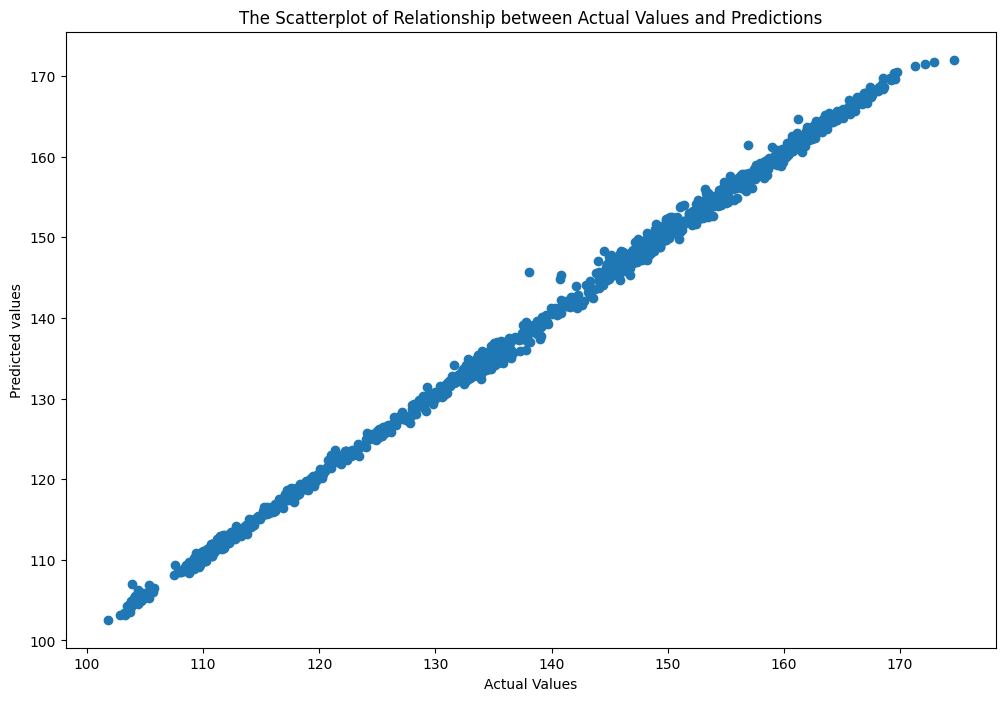

In [45]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [46]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5154555340016144
MSE: 0.47533929424898247
RMSE: 0.6894485435831904


R^2 calculation

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train):  0.9987403161727351
R2_score (test):  0.998101601421921


In [48]:
np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)

99.87

<ipython-input-49-7ea120996fcb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_predict_test,bins=50)


<Axes: ylabel='Density'>

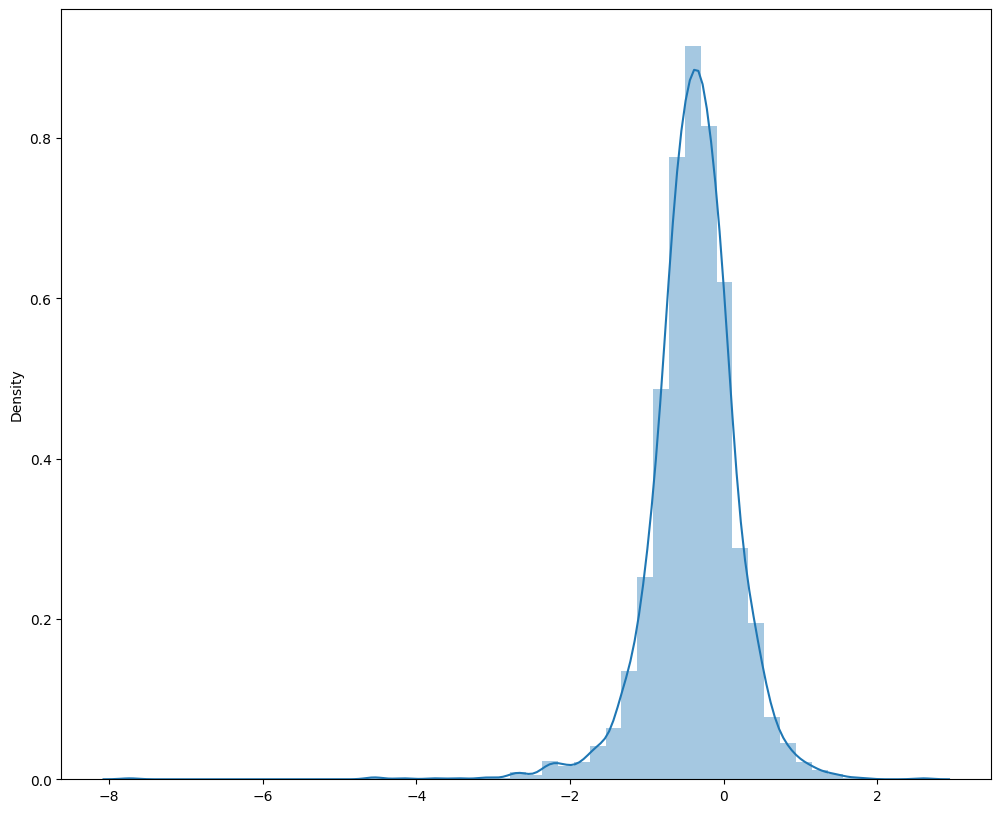

In [49]:
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50)

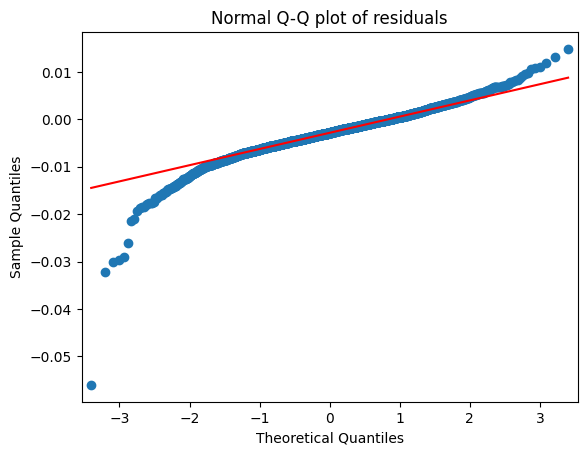

In [50]:
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()